In [42]:
# Run this cell to import all the libraries you need for this exercise
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


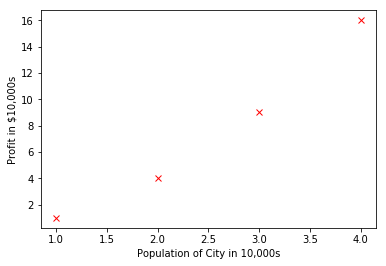

In [43]:
# Let's just make sure you know how produce a scatter plot of a few points first

def PlotData(x, y, xlabel, ylabel):
    # 
    # INSTRUCTIONS:
    # Write the code for PlotData(x,y) which is a function
    # that plots the data points x and y in a scatter plot 
    # with axes labels xlabel and ylabel.
    #
    # ====================== YOUR CODE HERE ======================
    # 
    plt.plot(x,y,'rx');
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.show();
    
    # ============================================================
    return

PlotData([1,2,3,4], [1,4,9,16], 'Population of City in 10,000s', 'Profit in $10,000s')


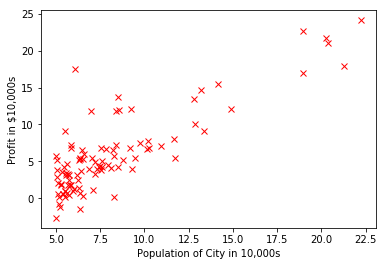

In [44]:
# Let's read in the data from 'ex1data1.txt'
f = open('ex1data1.txt', 'r')

x_list = []
y_list = []

# INSTRUCTIONS: 
# Write code to process the data. Each line of the file contains
# two numbers x and y separated by a comma. Put all the x's 
# into the x list and the y's into the y list,
# which will later be passed to your function PlotData
# ====================== YOUR CODE HERE ======================
#
for line in f:
    x_str, y_str = line.strip().split(',')
    x_list.append(float(x_str))
    y_list.append(float(y_str))

# ============================================================

# Let's see what the data looks like
x = np.array(x_list).reshape(len(x_list),1)
y = np.array(y_list).reshape(len(y_list),1)
PlotData(x, y, 'Population of City in 10,000s', 'Profit in $10,000s')
f.close()

In [45]:
# Before we can apply gradient descent, we need to have in place a cost function

# The code below adds a column of ones to x and initializes theta to all zeros
X = np.c_[np.ones(len(x)),x]
theta = np.zeros((2, 1))

def ComputeCost(X, y, theta):
    # 
    # INSTRUCTIONS:
    # Write the code for ComputeCost, which is a function that computes
    # the cost of using theta as the parameter of the linear regression
    # J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    # parameter for linear regression to fit the data points in x and y.
    #
    # Let m = number of data points (or training examples)
    # Assume that: 
    #    x, y have shape (m,1).
    #    X, being x with an additional column of ones, has shape (m,2).
    #    theta has shape (2,1).
    
    m = len(y)
    
    # ====================== YOUR CODE HERE ======================
    #
    J = np.sum( np.square( np.dot( X, theta ) - y ) ) / (2*m)
    
    # ===========================================================
    return J

# compute and display initial cost
print(ComputeCost(X, y, theta))


32.072733877455676


In [54]:
# Now let's implement the Gradient Descent function

def GradientDescent(X, y, theta, alpha, num_iters):
    # 
    # INSTRUCTIONS:
    # Write the code for function gradientDescent(X, y, theta, alpha, num_iters)
    # which performs gradient descent to learn and return theta.
    # It updates theta by taking num_iters gradient steps with learning rate alpha.
    #
    
    # Initialize m = no. of training examples
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    
    for iter in range(0, num_iters):
        #
        # ====================== YOUR CODE HERE ======================
        #
        theta = theta - ( alpha / m ) * np.dot( np.transpose(X), ( np.dot( X, theta ) - y ) )

        # ============================================================
        # Save the cost J in every iteration
        J_history[iter] = ComputeCost(X, y, theta)
    
    # Let's just print the first 10 Js to check that the cost is decreasing nicely
    print(J_history[0:10])
    return theta

# Run gradient descent
theta = np.zeros((2, 1))
alpha = 0.01
iterations = 1500
theta = GradientDescent(X, y, theta, alpha, iterations)

[[6.73719046]
 [5.93159357]
 [5.90115471]
 [5.89522859]
 [5.89009494]
 [5.88500416]
 [5.87993248]
 [5.87487909]
 [5.86984391]
 [5.86482687]]


In [51]:
# print theta
print('Theta found by gradient descent: ')
print(theta)
print('Cost: ', ComputeCost(X, y, theta))

Theta found by gradient descent: 
[[-3.89578088]
 [ 1.19303364]]
Cost:  4.476971375975179


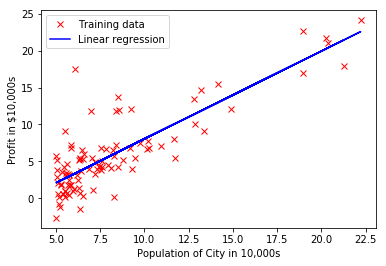

In [52]:
# Plot the linear fit
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(x,y,marker='x',lw=0,color='r',label='Training data')
plt.plot(x,np.matmul(X,theta),linestyle='-',color='b',label='Linear regression')
plt.legend()
plt.show()

In [53]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.matmul(np.matrix('1 3.5'), theta)
print('For population = 35,000, we predict a profit of:', predict1*10000);
predict2 = np.matmul(np.matrix('1, 7'), theta)
print('For population = 70,000, we predict a profit of:', predict2*10000);

For population = 35,000, we predict a profit of: [[2798.36876356]]
For population = 70,000, we predict a profit of: [[44554.54631017]]


In [39]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, num=100)
theta1_vals = np.linspace(-1, 4, num=100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals),len(theta1_vals)))

# Fill up J_vals                 
for i in range(0,len(theta0_vals)):            
    for j in range(0,len(theta1_vals)):
        t = np.matrix([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i,j] = ComputeCost(X, y, t)

# Because of the way meshgrids work in the surf command, we need to 
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = np.matrix.transpose(J_vals)

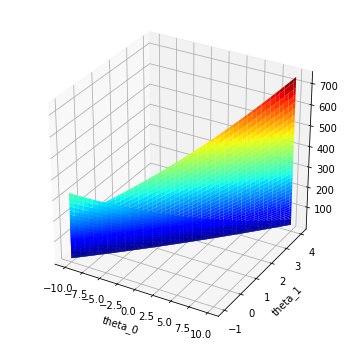

In [40]:
# Surface plot
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
plt.xlabel('theta_0')
plt.ylabel('theta_1')          
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals,cmap=cm.jet)
plt.show()


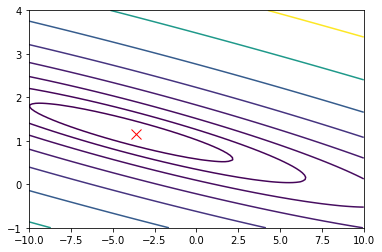

In [41]:
# Contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2)
plt.show()